# Статистическая обработка данных

### 1. Основные характеристики случайных величин

In [28]:
import numpy as np
import random
import scipy.stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt

n = 1000
X=np.random.sample(n)
#X=np.random.sample((n, 2))

#print (X)

print ('_'*40)
print (len(X))
print(np.mean(X))


________________________________________
1000
0.49632374543547597


**Среднее значение** $$\frac{\sum_{i=0}^{n} X_i}{n} = \bar{X} = \mu = \mathbb{M}[X] = \mathbb{E}[X]$$

In [29]:
N = len(X)
print(N)

Mu = sum(X)/N
print(Mu)
print ('_'*40)
print(np.mean(X))

1000
0.4963237454354761
________________________________________
0.49632374543547597


**Максимальное и минимальное значение**

In [30]:
Max_x = max(X)
Min_x = min(X)

print('max =', Max_x, '\nmin = ',  Min_x)

max = 0.9966283835822178 
min =  0.0001898620194750178


**Дисперсия** $$\sigma^2=\frac{(\sum_{i=1}^{n}(X_i-\mu)^2)}{(n-1)} = \mathbb{D}[X] = Var(X) = \mathbb{M}[(X - \mathbb{M}[X])^2]$$

In [32]:
SigmaSquared = (sum((X-Mu)**2))/(N-1)
print(SigmaSquared)
print ('_'*40)

print(np.var(X))
print ('_'*40)

print(np.std(X))
print ('_'*40)

print((np.std(X))**2)

0.0829611676524949
________________________________________
0.08287820648484225
________________________________________
0.2878857524867152
________________________________________
0.08287820648484226


**Коэффициент вариации**

In [5]:
kv = (np.sqrt(Sigma)/Mu)*100 

print (kv)

60.82580025501637


**Медиана**

In [33]:
#X = np.array([10, 12, 40, 500, 30, 80, 60, 700, 20, 13, 15, 40, 40, 35, 20, 10, 10])
#mu = np.mean(X)
#print (mu)

print('-'*40)
med = np.percentile(X, 50)
med1=np.median(X)
print (med)
print (med1)

----------------------------------------
0.4869169084787512
0.4869169084787512


**Мода**

In [36]:
X1 = np.array([10, 12, 40, 500, 30, 80, 60, 700, 20, 13, 15, 40, 40, 35, 20, 10, 10])
st.mode(X1)

ModeResult(mode=array([10]), count=array([3]))

**Гистограммы**

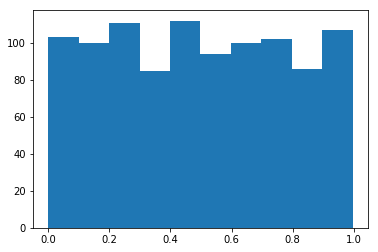

In [37]:

plt.hist(X, bins=10);

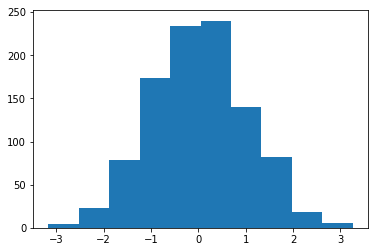

In [38]:
Y = np.random.randn(1000)
plt.hist(Y, bins=10);

**Ассиметрия и эксцесс**

In [39]:
print (st.skew(X))
print (st.skew(Y))
#W = np.array([0.2, -0.2, 0.5, 0.8, 0.6, 0.98, -0.2, -0.1, 0.9, 0.5, 0.58, 0.1, 0.4, 0.5])
#plt.hist(W, bins=10) 
#print (st.skew(W))

print('_ '*40)
print(st.kurtosis(Y))

0.03479718531781522
0.056855191000704186
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
-0.05509532790680982


###  2. Функции плотности вероятности  и функции распределения 

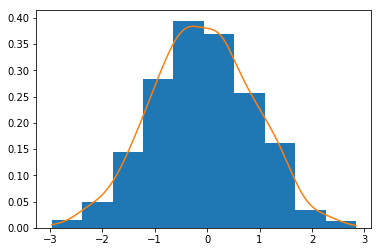

In [11]:
domain = np.linspace(np.max(Y), np.min(Y), 1000)

#print(domain)
kde1 = st.gaussian_kde(Y)

plt.hist(Y, bins=10, density = 1.0) 
plt.plot(domain, kde1(domain));

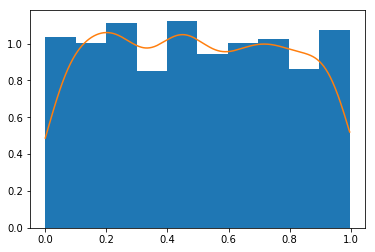

In [40]:
domain = np.linspace(np.max(X), np.min(X), 1000)

#print(domain)
kde1 = st.gaussian_kde(X)

plt.hist(X, bins=10, density = 1.0) 
plt.plot(domain, kde1(domain));

## Определение
$$F(x) = P(X<x)$$ $f(x) = F'(x)$ $$F(x) = P(X\le x) = \int_{-\infty}^x f(x) dx$$ или для интервала $$P(a\le X \le b) = \int_a^b f(x) dx = F(b) - F(a)$$ 

### Непрерывные СВ

#### Равномерное распределение

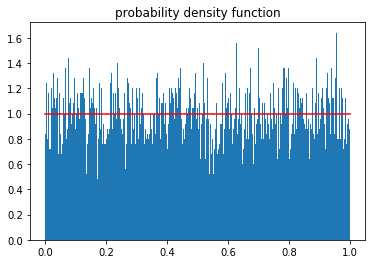

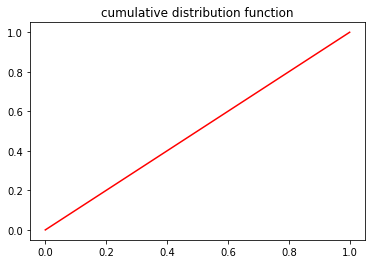

In [43]:
Contin = st.uniform(loc=0, scale=1)
Z = Contin.rvs(size=10000)
plt.hist(Z, bins=400, density = 1.0); 

grid = np.linspace(np.min(Z), np.max(Z), 100)
plt.title ('probability density function')
plt.plot(grid, Contin.pdf(grid), color = 'red');
plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

#### Нормальное распределение

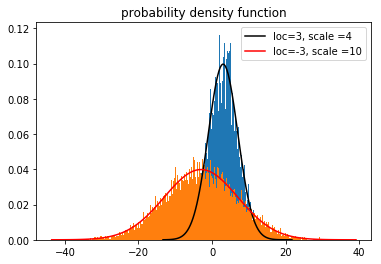

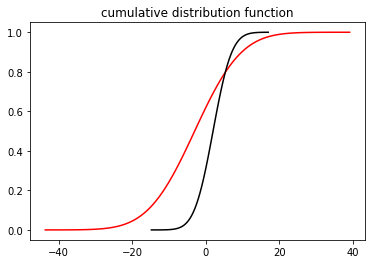

In [53]:
Contin = st.norm(loc=3, scale=4)
Z_1 = Contin.rvs(size=10000)

plt.title ('probability density function')

plt.hist(Z_1, bins=400, density = 1.0) ;

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.pdf(grid), color = 'black', label = 'loc=3, scale =4');

Contin = st.norm(loc=-3, scale=10)
Z_2 = Contin.rvs(size=10000)
plt.hist(Z_2, bins=400, density = 1.0) ;

grid = np.linspace(np.min(Z_2), np.max(Z_2), 100)
plt.plot(grid, Contin.pdf(grid), color = 'red', label = 'loc=-3, scale =10');

plt.legend()

plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

Contin = st.norm(loc=2, scale=4)
Z_1 = Contin.rvs(size=10000)
grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.plot(grid, Contin.cdf(grid), color = 'black');

#### Гамма - распределение

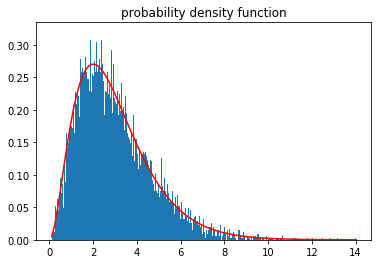

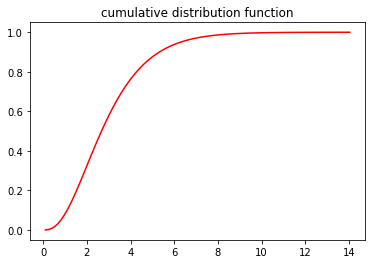

In [62]:
Contin = st.gamma(3)
Z_1 = Contin.rvs(size=10000)
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.title ('probability density function')
plt.plot(grid, Contin.pdf(grid), color = 'red');

plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

#### Распределение Лапласа

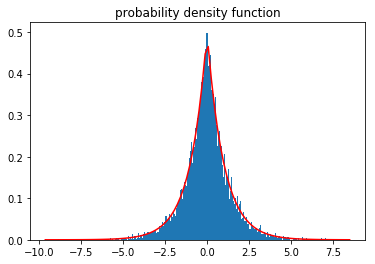

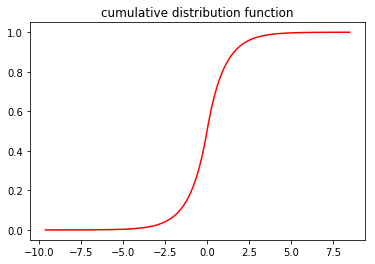

In [56]:
Contin = st.laplace(0, 1)
Z_1 = Contin.rvs(size=10000)
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.title ('probability density function')
plt.plot(grid, Contin.pdf(grid), color = 'red');

plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

#### Распределение Стьюдента

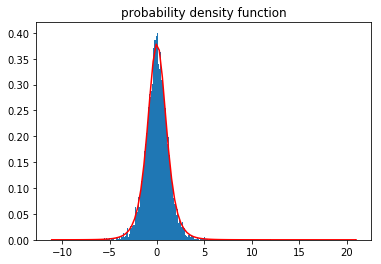

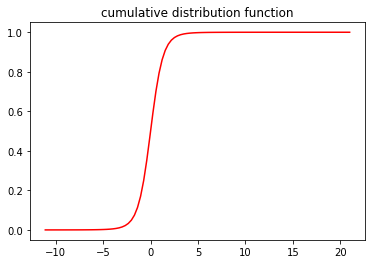

In [55]:
Contin = st.t(5, 0, 1)
Z_1 = Contin.rvs(size=10000)
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.title ('probability density function')
plt.plot(grid, Contin.pdf(grid), color = 'red');

plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

#### Распределение хи-квадрат

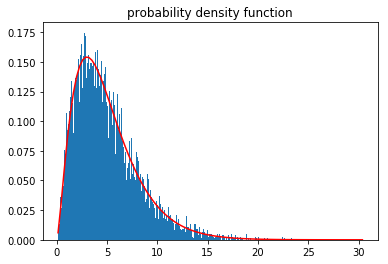

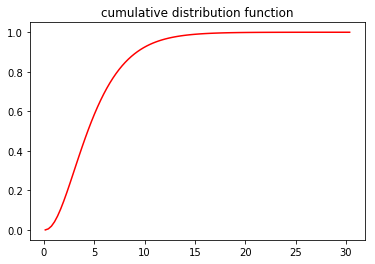

In [57]:
Contin = st.chi2(5, 0, 1)
Z_1 = Contin.rvs(size=10000)
plt.hist(Z_1, bins=400, density = 1.0);

grid = np.linspace(np.min(Z_1), np.max(Z_1), 100)
plt.title ('probability density function')
plt.plot(grid, Contin.pdf(grid), color = 'red');

plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Contin.cdf(grid), color = 'red');

### Дискретные СВ

#### Распределение Бернулли

[0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1]


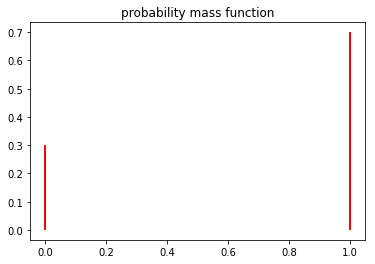

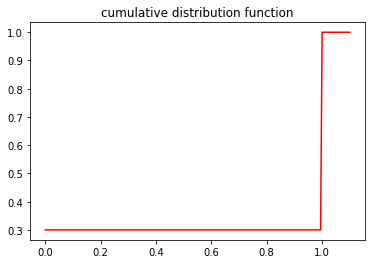

In [83]:
Discr = st.bernoulli(0.7)
Z_1 = Discr.rvs(size=100)
print (Z_1)

plt.title ('probability mass function')
plt.vlines(Z_1,0, Discr.pmf(Z_1), color = 'red');

grid = np.linspace(0.0, 1.1, 200)
plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Discr.cdf(grid), color = 'red');


#### Биномиальное распределение

[2 1 2 2 1 3 4 1 1 1 1 2 3 3 0 2 1 2 2 1 1 1 2 3 1 0 2 0 2 2 2 1 0 1 0 1 0
 3 1 1 0 0 1 2 1 2 5 0 0 1 0 0 3 3 2 1 3 2 3 2 3 3 3 3 0 1 1 0 3 1 2 0 0 0
 1 3 1 2 0 2 1 2 2 1 1 1 3 1 3 0 4 1 3 3 1 0 2 0 1 0]


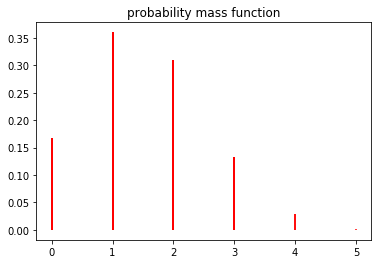

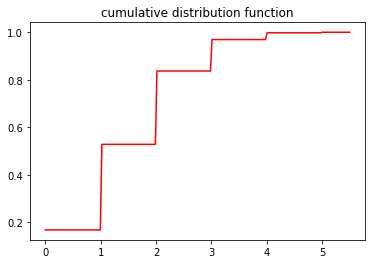

In [69]:
Discr = st.binom(5, 0.3)
Z_1 = Discr.rvs(size=100)
print (Z_1)

plt.title ('probability mass function')
plt.vlines(Z_1, 0, Discr.pmf(Z_1), color = 'red');

grid = np.linspace(0.0, 5.5, 200)
plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Discr.cdf(grid), color = 'red');

#### Распределение Пуассона

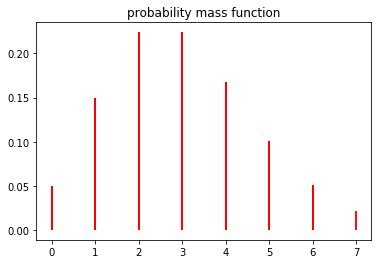

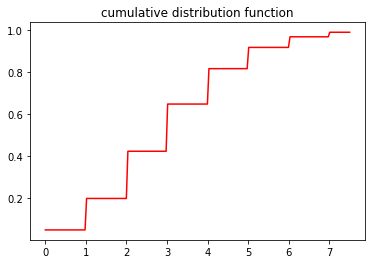

In [81]:
Discr = st.poisson(3, loc = 0)
Z_1 = Discr.rvs(size=100)
#print (Z_1)

plt.title ('probability mass function')
plt.vlines(Z_1, 0, Discr.pmf(Z_1), color = 'red');

grid = np.linspace(0.0, 7.5, 200)
plt.figure()
plt.title ('cumulative distribution function')
plt.plot(grid, Discr.cdf(grid), color = 'red');